# Genetic algoritm by personal

## Import Libraries

In [85]:
import numpy as np
from numpy.random import randint
from numpy.random import rand
import pandas as pd
from sklearn import linear_model, datasets
from geneticalgorithm import geneticalgorithm
from genetic_selection import GeneticSelectionCV

## Objective Functions To Be Optimized

In [41]:
def f(x):
  return -sum(x)

## Parameter Initialization

In [42]:
n_iter = 2000
n_bits = 20
n_pop = 100
r_cross = 0.9
r_mut = 1/float(n_bits)

## Genetic Operator Functions

In [43]:
#tournament
def selection(pop, scores, k=3):
  selection_ix = randint(len(pop))
  for ix in randint(0,len(pop), k-1):
    if scores[ix] < scores[selection_ix]:
      selection_idx = ix
  return pop[selection_ix]

In [44]:
def crossover(p1, p2, r_cross):
  c1, c2 = p1.copy(), p2.copy()
  if rand()< r_cross:
    pt = randint(1,len(p1)-2)
    c1 = p1[:pt] + p2[pt:]
    c2 = p2[:pt] + p1[pt:]
  return [c1,c2]

In [45]:
def mutation(bitstring, r_mut):
  for i in range(len(bitstring)):
    if rand() < r_mut:
      bitstring[i] = 1-bitstring[i]
  return bitstring

# mutation([1,1,0,0], 0.2)

## Algorithm

In [46]:
def genetic_alogorithm(f, n_bits, n_iter, n_pop, r_cross, r_mut):

  pop = [randint(0,2, n_bits).tolist() for _ in range(n_pop)] #ایجاد نقاط اطراف مراکز جمعیتی
  best, best_eval = 0, f(pop[0])
  for gen in range(n_iter):
    scores = [f(c) for c in pop]
    for i in range(n_pop):
      if scores[i]< best_eval:
        best, best_eval = pop[i], scores[i]
        print('pop = ',pop[i], 'score = ', scores[i])

    selected = [selection(pop, scores) for _ in range(n_pop)]
    children = list()
    for i in range(0,n_pop,2):
      p1, p2 = selected[i], selected[i+1]
      y = crossover(p1,p2, r_cross)
      for c in y:
        mutation(c, r_mut)
        children.append(c)
      pop = children

  return [best, best_eval]

## Final Implementation Function

In [47]:
best, score = genetic_alogorithm(f, n_bits, n_iter, n_pop, r_cross, r_mut)

pop =  [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] score =  -14
pop =  [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1] score =  -15
pop =  [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0] score =  -16
pop =  [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] score =  -17
pop =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1] score =  -18
pop =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] score =  -19


# Genetic algoritm by python Lybrary


In [ ]:
# def f(x): 
#     return sum(x)

In [76]:
def f(x):
  pen = -2
  if x[0] + x[1]<2:
    return sum(x)-2
  else:
    return sum(x)

In [112]:
def f1(x): # f(x)= x1 +x2 + x3 min
    return x[0] + x[1] + x[2]
def f2(x): # f(x)= x1 +x2 + x3 max
    return x[0] - x[1] - x[2]
def f3(x): # f(x)= x1 +x2 + x3 min
    return x[0] * x[1] * x[2]
def g(x):
    return f1(x)-f2(x)-f3(x)

In [113]:
bound = np.array([[-5,100]]*3)
bound

array([[ -5, 100],
       [ -5, 100],
       [ -5, 100]])

 The best solution found:                                                                           
 [99.97770472 99.95979535 99.94217041]

 Objective function:
 -998397.3518917405


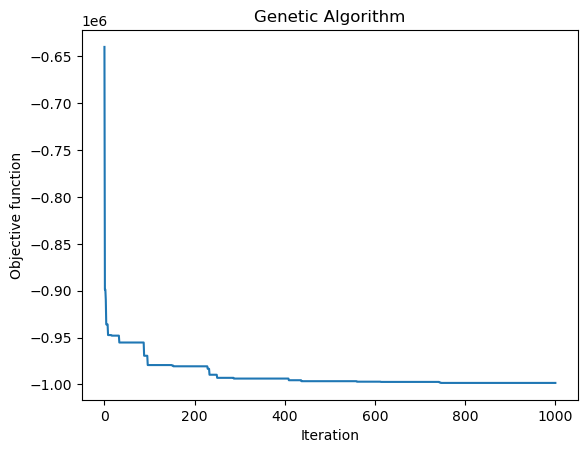

In [114]:
GA_model = geneticalgorithm(function= g, dimension =3, variable_type ='real',variable_boundaries = bound, 
      algorithm_parameters= {'max_num_iteration': 1000,'population_size': 100,'mutation_probability': 0.1,
                              'elit_ratio': 0.01,'crossover_probability': 0.5,'parents_portion': 0.3,
                              'crossover_type': 'uniform', 'max_iteration_without_improv':None}  )

GA_model.run()

# Exersi

In [95]:
iris = datasets.load_iris()
iris.data.shape
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [104]:
E = np.random.uniform(0,0.1, size = (len(iris.data), 30))
E.shape

(150, 30)

In [106]:
x = np.hstack((iris.data, E))
y= iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [100]:
clf = linear_model.LogisticRegression(solver = 'liblinear', multi_class = 'auto')

selector = GeneticSelectionCV(clf, cv=5, scoring='accuracy', fit_params=None, 
                   max_features=5, verbose=1, n_jobs=1, n_population=300,
                   crossover_proba=0.5, mutation_proba=0.2, n_generations=40, 
                   crossover_independent_proba=0.1, mutation_independent_proba=0.05,
                   tournament_size=3, n_gen_no_change=None, caching=False)

out = selector.fit(x,y)

len(out.support_)

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                	max                            
0  	300   	[ 0.474889  2.966667  0.056828]	[ 0.202043  1.365853  0.02271 ]	[ 0.24  1.    0.  ]	[ 0.953333  5.        0.125433]
1  	179   	[-766.081756    3.47      766.712328]	[ 2660.786692     1.558557  2660.604983]	[-10000.      1.      0.]	[     0.953333      9.        10000.      ]
2  	172   	[-699.278022    3.643333  700.046027]	[ 2551.668245     1.463827  2551.457537]	[-10000.      1.      0.]	[     0.953333      8.        10000.      ]
3  	193   	[-1065.894911     3.813333  1066.711065]	[ 3087.15652      1.47371   3086.874499]	[-10000.           1.           0.01633]	[     0.953333      9.        10000.      ]
4  	182   	[-965.857      3.97     966.70805]      	[ 2955.298234     1.479561  2955.019833]	[-10000.           1.           0.01633]	[     0.953333     10.        10000.      ]
5  	180   	[-999.177067    

34

In [101]:
out.support_

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])